# HW 9 – Decision Trees

## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv('lendingclub.csv')

In [4]:
df.head()

,home_ownership,income,dti,fico,loan_status
0,1,43.0,39.66,670,0
1,1,80.0,39.54,685,1
2,0,30.0,39.52,695,1
3,1,105.0,39.45,710,0
4,0,28.6,39.28,680,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   home_ownership  2270 non-null   int64  
 1   income          2270 non-null   float64
 2   dti             2270 non-null   float64
 3   fico            2270 non-null   int64  
 4   loan_status     2270 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 88.8 KB


In [6]:
df.nunique()

home_ownership       2
income             470
dti               1617
fico                34
loan_status          2
dtype: int64

In [7]:
categorical = ['home_ownership', 'loan_status']

for col in categorical:
    df[col]=df[col].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   home_ownership  2270 non-null   category
 1   income          2270 non-null   float64 
 2   dti             2270 non-null   float64 
 3   fico            2270 non-null   int64   
 4   loan_status     2270 non-null   category
dtypes: category(2), float64(2), int64(1)
memory usage: 58.0 KB


In [9]:
df.isna().sum()

home_ownership    0
income            0
dti               0
fico              0
loan_status       0
dtype: int64

In [10]:
sum(df.duplicated())

0

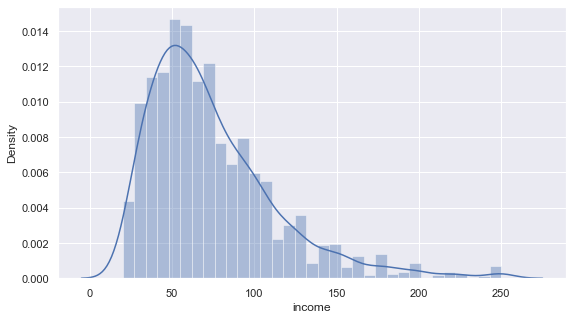

In [11]:
#plotting the distributions for credit limit (left) and age (right)

plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.income)

plt.show()

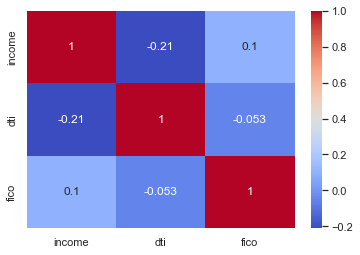

In [12]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

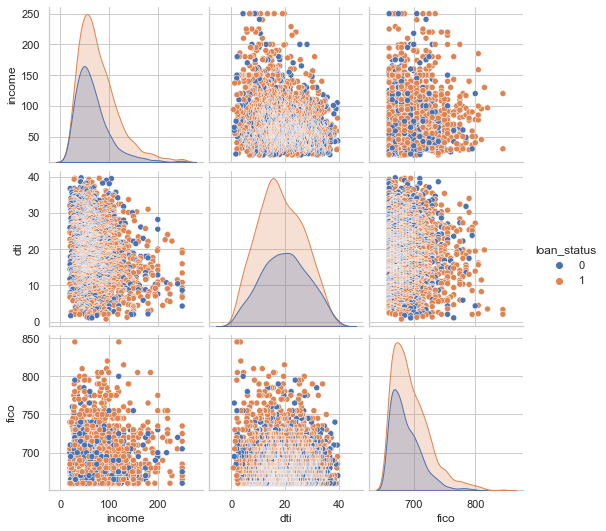

In [13]:
sns.set_style('whitegrid')
sns.pairplot(df, hue= 'loan_status')
plt.show()

## Decision Trees Classification

### 1. What are the proportions of Good condition loans vs defaulted ones in the data set? Is the target variable (relatively) balanced or (relatively) imbalanced? (5points)

In [14]:
pd.crosstab(df['loan_status'],df['loan_status'], normalize='all')*100

loan_status,0,1
loan_status,,
0,35.066079,0.000000
1,0.000000,64.933921


Our dataset is relatively balanced. This means that we can use accuracy as a measure of performance! 

### 2. Along with the target variable, define your feature space (X) and split the data into test (20%) and train set (80%) (5 points)

In [15]:
y = df['loan_status']
X = df.drop('loan_status', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [16]:
X_train.head()

,home_ownership,income,dti,fico
1377,1,108.000,15.96,685
1803,1,150.000,11.30,685
1431,1,54.000,15.38,665
1666,1,50.000,13.13,720
425,1,77.721,27.18,800


### 3. From sklearn.svm import the relevant function for decision trees classification. Do the followings: (20 points)

In [17]:
from sklearn.tree import DecisionTreeClassifier

#### 1. Train the DT classification model using its default inputs. (5 points)

In [18]:
Tree_classifier = DecisionTreeClassifier()
Tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

#### 2. Make classifications on the test set and save them as y_hat (5 points)

In [19]:
# Predicting the Test set classes
y_hat       = Tree_classifier.predict(X_test)

#### 3. Use the built-in classification report function from sklearn. Report the Accuracy, precision, recall and f1 score along with the confusion matrix. Interpret all of these statistics. Do you trust the accuracy of the model? why? (10 points)

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [21]:
print(confusion_matrix(y_test, y_hat))

[[ 66  94]
 [107 187]]


In [22]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.38      0.41      0.40       160
           1       0.67      0.64      0.65       294

    accuracy                           0.56       454
   macro avg       0.52      0.52      0.52       454
weighted avg       0.57      0.56      0.56       454



Because the dataset is relatively balanced, we would use accuracy to measure the performance of the model. In this case **the accuracy is 0.56** which means that 56% of the predictions were correct. In other words the model is slightly better than random random prediction. 

### 4. Pruning the tree: plot the accuracy_CV vs alphas from the cost complexity pruning path. Report the optimal value for alpha. (10 points)

In [23]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(X_train,y_train)

In [24]:
path

{'ccp_alphas': array([0.        , 0.00029369, 0.0003304 , 0.00033373, 0.00033887,
        0.00034263, 0.00034263, 0.00035042, 0.00035745, 0.00036711,
        0.00036711, 0.00036711, 0.00036711, 0.00036711, 0.00036711,
        0.00036711, 0.00036711, 0.00036711, 0.00036711, 0.00036711,
        0.00037275, 0.00041097, 0.000413  , 0.000413  , 0.000413  ,
        0.000413  , 0.000413  , 0.000413  , 0.000413  , 0.000413  ,
        0.000413  , 0.000413  , 0.00044053, 0.00044053, 0.00044053,
        0.00044053, 0.00044053, 0.00044053, 0.00044053, 0.00044053,
        0.00044053, 0.00044053, 0.00045054, 0.00045888, 0.00045888,
        0.00045888, 0.00045888, 0.00045888, 0.00045888, 0.00045888,
        0.00045888, 0.00045888, 0.00045968, 0.00047199, 0.00047199,
        0.00047199, 0.00047199, 0.00047199, 0.00047199, 0.00048183,
        0.00048183, 0.00048183, 0.00048948, 0.00048948, 0.00048948,
        0.00048948, 0.00048948, 0.00049504, 0.00049559, 0.00049559,
        0.00049559, 0.00049559, 0.

In [25]:
ccp_alphas = path.ccp_alphas

In [26]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
#sorted(sklearn.metrics.SCORERS.keys())

In [27]:
accuracy_cv =[]
for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
    accuracy_cv.append(np.mean(accuracy))
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head()

,alpha,accuracy_CV
0,0.000000,0.552871
1,0.000294,0.549013
2,0.000330,0.549560
3,0.000334,0.553972
4,0.000339,0.556719


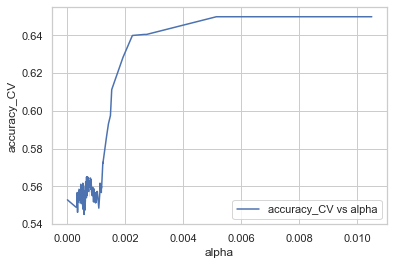

In [28]:
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='b', label="accuracy_CV vs alpha")
plt.show()

In [29]:
np.argmax(output['accuracy_CV'])

212

In [30]:
output.iloc[np.argmax(output['accuracy_CV']),]

alpha          0.005143
accuracy_CV    0.649781
Name: 212, dtype: float64

In [31]:
optimal_alpha = output.iloc[np.argmax(output['accuracy_CV']),0]
optimal_alpha

0.005142538659615947

The optimal value for alpha is 0.005. 

### 5. Re-estimate  (Re-fit) the DT classification model with the optimal alpha. Save the predictions as y_hat_optimized. (5 points)

In [32]:
optimal_DT = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)

y_hat_opt = optimal_DT.predict(X_test)

### 6. Report the optimized classification metrics and compare them with the outputs from part 3.3 in Question2. Do you notice anything strange? what is going on here? (10 points)

In [33]:
print(confusion_matrix(y_test, y_hat_opt))

[[  0 160]
 [  0 294]]


__Optimized classification metrics:__

In [34]:
print(classification_report(y_test, y_hat_opt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       160
           1       0.65      1.00      0.79       294

    accuracy                           0.65       454
   macro avg       0.32      0.50      0.39       454
weighted avg       0.42      0.65      0.51       454



__Output from part 3.3:__

In [35]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.38      0.41      0.40       160
           1       0.67      0.64      0.65       294

    accuracy                           0.56       454
   macro avg       0.52      0.52      0.52       454
weighted avg       0.57      0.56      0.56       454



This shows us that accuracy went up after we used the optimal alpha. It improved from 56% to 65%! It is interesting though that recall is now at 1.00 or 100%. This means that of all the cases that were classified as "in good standing" the model classified 100% of them correctly. This might indicated that the model isn't quite performing the way it should. It might be under reporting "not in good standing". We'll have to investigate the decision tree a little further. 

### 7. Estimate the optimized accuracy_test using 5 fold cross validation

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
accuracy = cross_val_score(estimator = optimal_DT, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [38]:
accuracy

array([0.64835165, 0.65013774, 0.65013774, 0.65013774, 0.65013774])

In [39]:
round(accuracy.mean(),3)

0.65

### 8. Visualize a classification tree with the following hyper parameters: max_depth=4, min_samples_leaf=50. (20 points)

In [40]:
dtree= DecisionTreeClassifier(max_depth=4, min_samples_leaf=50)
dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

In [41]:
from sklearn.tree import plot_tree

In [42]:
X_train.shape

(1816, 4)

In [43]:
X_train.head()

,home_ownership,income,dti,fico
1377,1,108.000,15.96,685
1803,1,150.000,11.30,685
1431,1,54.000,15.38,665
1666,1,50.000,13.13,720
425,1,77.721,27.18,800


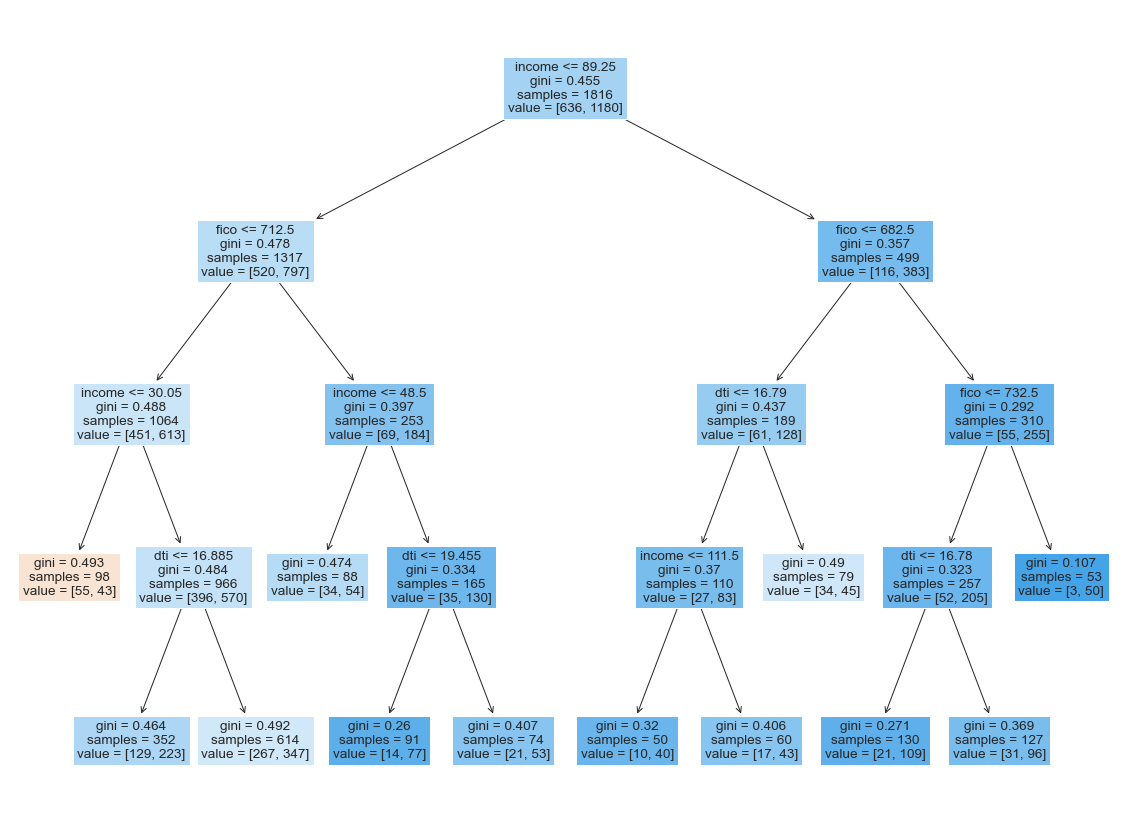

In [44]:
fig = plt.figure(figsize=(20,15))
DT_plot = plot_tree(dtree, feature_names=X_train.columns, filled=True)
# left branch True

#### 1. In your decision tree, what is the best feature to start with and where does the algorithm put the cut off point? (5 points)

The best feature to start with is income. The model puts the cut off at 89.25. 

#### 2. Interpret what you see!  take one path for example and go down the tree. If income < ... and fico < .... and .... then default or good condition (5 points) (Left means true!) 

If your income is <=89.25, your fico score is > 712.5, your income is > 48.5, your dti is <= 19.455, then you aren't predicted to default! 

#### 3. How many terminal nodes do you see? why the number of terminal nodes is less than 16 in this example? (5 points)

I see 12 terminal nodes. The number of terminal nodes is less than 16 because we set the minimum leaf size at 50. So some of the nodes were forced to reach a terminal point earlier on. 

#### 4. Are you satisfied with the gini numbers at the terminal nodes in general? explain why? (5 points)

I am not satisfied with the gini numbers at the terminal nodes. 7 of the 12 nodes have a gini coefficient that is higher than 0.4. This isn't very good. This mights that maybe we should let the tree grow more. 

In [46]:
!jupyter nbconvert --to html HW9.ipynb

[NbConvertApp] Converting notebook HW9.ipynb to html
[NbConvertApp] Writing 1162818 bytes to HW9.html
